## Task2: Restaurant Recommendation 

Import necessary libraries: pandas for data manipulation, LabelEncoder for encoding categorical variables, CountVectorizer for converting text data into a matrix of token counts, and cosine_similarity for calculating cosine similarity between vectors, matplotlib for plotting the data.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv("D://Cognifyz Internship//Internship task Dataset.csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
data.shape

(9551, 21)

In [4]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

## Data Cleaning Process 

In [5]:
data.isnull().sum()  #Checking null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df = data.drop(['Restaurant ID','Country Code','City','Address','Locality','Locality Verbose','Longitude','Latitude','Currency','Is delivering now'],axis=1)

In [7]:
df1 = df.dropna()
df1.isnull().sum()

Restaurant Name         0
Cuisines                0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df1.head()

,Restaurant Name,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,"French, Japanese, Desserts",1100,Yes,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,Japanese,1200,Yes,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4,4.4,Green,Very Good,270
3,Ooma,"Japanese, Sushi",1500,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,"Japanese, Korean",1500,Yes,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
df1.shape

(9542, 11)

In [10]:
print("restaurantName_counts_min:",df1['Restaurant Name'].min())

print("restaurantName_counts_max:",df1['Restaurant Name'].max())

restaurantName_counts_min: #45
restaurantName_counts_max: �ukura��a Sofras۱


In [11]:
# Count restaurant names containing '��' or any other specified symbols
RestaurantName_symbol_count = df1['Restaurant Name'].str.count('�').sum()

# Display the count
print("Count of restaurant names containing '�':", RestaurantName_symbol_count)

Count of restaurant names containing '�': 212


In [12]:
# Assuming your DataFrame is named df1 and the column is 'Restaurant Name'
restaurant_with_special_character = df1[df1['Restaurant Name'].str.contains('�')]

# Print the names of restaurants with the special character
print("Restaurant names containing '�':")
print(restaurant_with_special_character['Restaurant Name'])

Restaurant names containing '�':
23        Caf�� Daniel Briand
26             Pizza �� Bessa
30             Sandubas Caf��
36                     Tayp��
38                    Manzu��
                ...          
9542           Leman K�_lt�_r
9543             Dem Karak�_y
9544    Karak�_y G�_ll�_o��lu
9547             Ceviz A��ac۱
9549              A���k Kahve
Name: Restaurant Name, Length: 103, dtype: object


In [13]:
# Assuming your DataFrame is named df1 and the column is 'Restaurant Name'
df1['Restaurant Name'] = df1['Restaurant Name'].str.replace('�', '')

# Find and print the names of restaurants with the special character
restaurants_with_special_char_after_replace = df1[df1['Restaurant Name'].str.contains('�')]

# Print the names of restaurants after replacement
print("Restaurant names containing '�' after replacement:")
print(restaurants_with_special_char_after_replace['Restaurant Name'])

Restaurant names containing '�' after replacement:
Series([], Name: Restaurant Name, dtype: object)


C:\Users\NiRaja\AppData\Local\Temp\ipykernel_23228\3728192271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Restaurant Name'] = df1['Restaurant Name'].str.replace('�', '')


In [14]:
df1['Restaurant Name']

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                 Naml۱ Gurme
9547                  Ceviz Aac۱
9548                       Huqqa
9549                    Ak Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9542, dtype: object

In [15]:
# Assuming your DataFrame is named df1 and the column is 'Cuisines'
cuisines_with_special_character = df1[df1['Cuisines'].str.contains('�')]

# Print the names of cuisines with the special character
print("Cuisines names containing '�':")
print(cuisines_with_special_character['Cuisines'])

Cuisines_symbol_count = df1['Cuisines'].str.count('�').sum()

print("Count of Cuisines containing '�':", Cuisines_symbol_count)

Cuisines names containing '�':
9530    Kebab, Turkish Pizza, D�_ner
9544                Desserts, B�_rek
Name: Cuisines, dtype: object
Count of Cuisines containing '�': 2


In [16]:
# Assuming your DataFrame is named df and the column is 'Cuisines'
df1['Cuisines'] = df1['Cuisines'].str.replace('�', '')

# Find and print the names of restaurants with the special character
cuisines_special_char_after_replace = df1[df1['Cuisines'].str.contains('�')]

# Print the names of restaurants after replacement
print("Cuisines names containing '�' after replacement:")
print(cuisines_special_char_after_replace['Cuisines'])

Cuisines names containing '�' after replacement:
Series([], Name: Cuisines, dtype: object)


C:\Users\NiRaja\AppData\Local\Temp\ipykernel_23228\3367944235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cuisines'] = df1['Cuisines'].str.replace('�', '')


In [17]:
df1['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9542, dtype: object

In [18]:
# Assuming your DataFrame is named df and the column is 'Rating text'
RatingText_with_special_character = df1[df1['Rating text'].str.contains('�')]

# Print the names of restaurants with the special character
print("Rating text containing '�':")
print(RatingText_with_special_character['Rating text'])

Rating text containing '�':
Series([], Name: Rating text, dtype: object)


In [19]:
# Assuming your DataFrame is named df and the column is 'Rating color'
RatingColor_with_special_character = df1[df1['Rating color'].str.contains('�')]

# Print the names of restaurants with the special character
print("Rating text containing '�':")
print(RatingColor_with_special_character['Rating color'])

Rating text containing '�':
Series([], Name: Rating color, dtype: object)


In [20]:
df1.shape

(9542, 11)

# Exploratory Data Analysis

### Restaurant Name

In [21]:
restaurantName_counts = df1['Restaurant Name'].value_counts()

# Display counts
print(restaurantName_counts)

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7437, dtype: int64


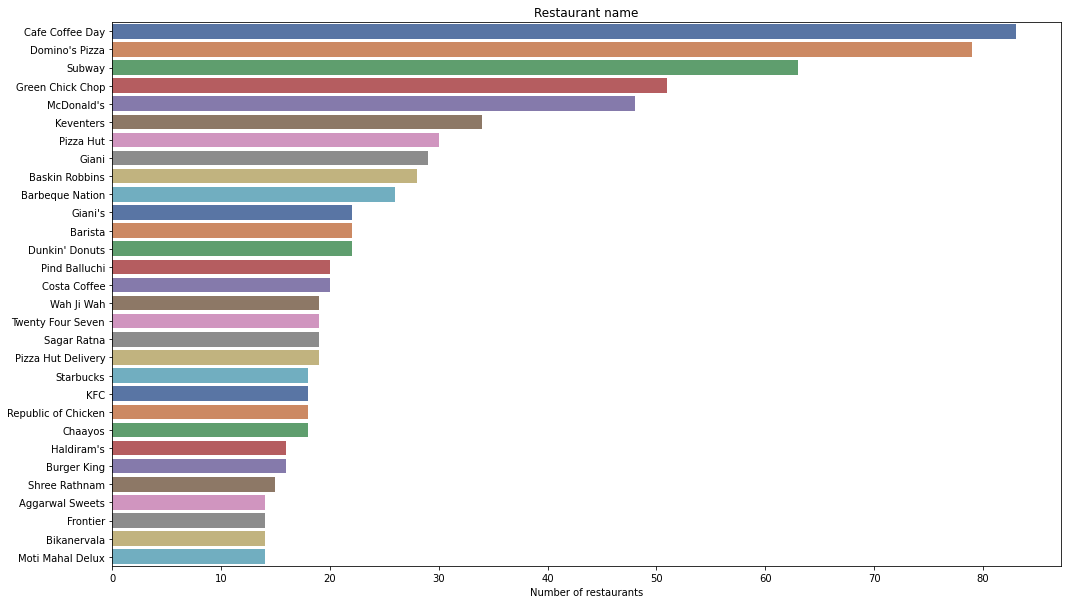

In [22]:
plt.figure(figsize=(17,10))
chains = df1['Restaurant Name'].value_counts()[:30]
sns.barplot(x=chains, y=chains.index, palette='deep')
plt.title("Restaurant name")
plt.xlabel("Number of restaurants")
plt.show()

### Cuisines 

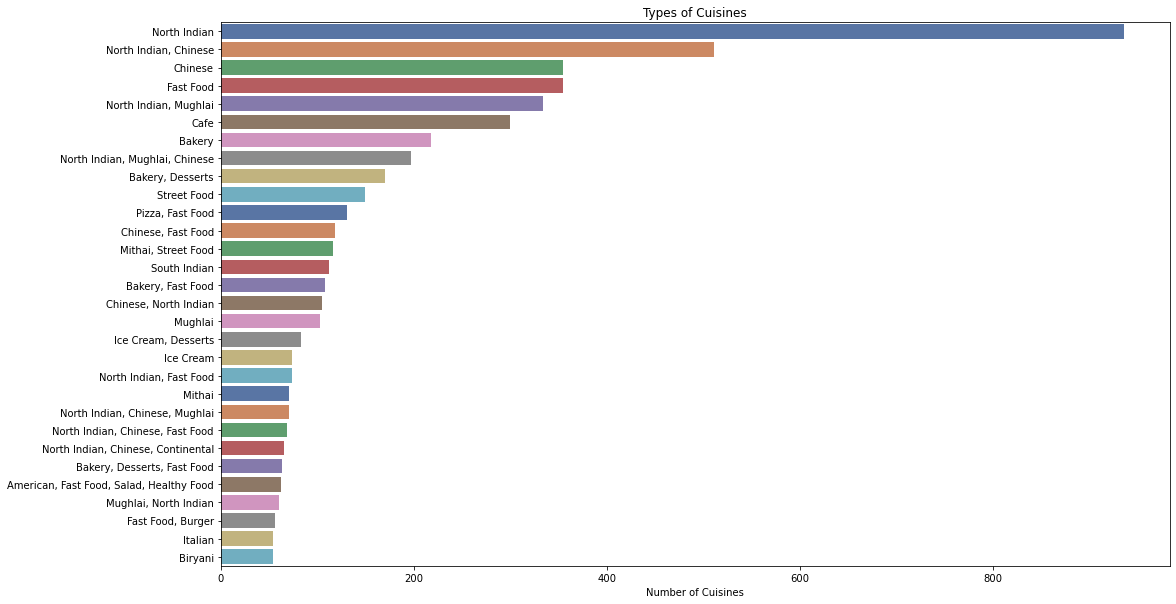

In [23]:
plt.figure(figsize=(17,10))
chains = df1['Cuisines'].value_counts()[:30]
sns.barplot(x=chains, y=chains.index, palette='deep')
plt.title("Types of Cuisines")
plt.xlabel("Number of Cuisines")
plt.show()

In [24]:
import re
import pandas as pd

# Assuming 'Cuisines' column contains strings or NaN values
df1['Cuisines'] = df1['Cuisines'].astype(str)

df1.index = range(df1.shape[0])
likes = []

for i in range(df1.shape[0]):
    array_split = re.split(',', df1['Cuisines'][i])
    for item in array_split:
        likes.append(item.strip())  # Add strip() to remove leading/trailing whitespaces

df1.index = range(df1.shape[0])
df1.index

print("Count of Most liked Cuisines")
favourite_food = pd.Series(likes).value_counts()
print(favourite_food.head(20))
print(favourite_food[20:30])
print(favourite_food[30:40])
print(favourite_food[40:50])
print(favourite_food[50:60])
print(favourite_food[60:70])
print(favourite_food[70:80])
print(favourite_food[80:90])
print(favourite_food[90:100])
print(favourite_food[100:])
print("length of favourite_food:",len(favourite_food))

C:\Users\NiRaja\AppData\Local\Temp\ipykernel_23228\565606527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cuisines'] = df1['Cuisines'].astype(str)


Count of Most liked Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Street Food      562
American         390
Pizza            381
Mithai           380
Burger           251
Thai             234
Asian            233
Beverages        229
Ice Cream        226
Mexican          181
dtype: int64
Biryani          177
Seafood          174
Healthy Food     150
European         148
Japanese         135
Finger Food      114
Raw Meats        114
Mediterranean    112
Salad             93
Sushi             75
dtype: int64
Indian       70
Lebanese     69
Steak        62
Sandwich     53
Tea          48
Tibetan      44
Breakfast    41
Bar Food     39
BBQ          33
French       29
dtype: int64
Juices            29
Bengali           29
Arabian           28
Brazilian         28
Hyderabadi        26
Southern          24
Kerala          

In [25]:
df1.Cuisines = df1.Cuisines.apply(lambda x: x.strip())
Cuisines_stats = df1.groupby('Cuisines')['Cuisines'].agg('count').sort_values(ascending=False)
Cuisines_stats

C:\Users\NiRaja\AppData\Local\Temp\ipykernel_23228\364728957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Cuisines = df1.Cuisines.apply(lambda x: x.strip())


Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Continental, Italian, North Indian, Lebanese, Thai         1
Continental, Italian, North Indian, Lebanese               1
Continental, Italian, North Indian, Chinese, Lebanese      1
Continental, Italian, North Indian, Chinese                1
World Cuisine, Patisserie, Cafe                            1
Name: Cuisines, Length: 1825, dtype: int64

### Table Booking 

In [26]:
TableBooking_counts = df1['Has Table booking'].str.lower().value_counts()

# Display the counts
print("Count of 'No':", TableBooking_counts.loc['no'])
print("Count of 'Yes':", TableBooking_counts.loc['yes'])

Count of 'No': 8384
Count of 'Yes': 1158


In [28]:
# Whether restaurant offer table booking or not

import plotly.graph_objects as go
import plotly.offline as py
x = df1['Has Table booking'].value_counts()
# colors = ['#800080', '#0000A0']
colors = ['orange', 'brown']

trace = go.Pie(labels=x.index, values=x, textinfo="value",
              marker=dict(colors=colors,
                         line=dict(color='#001000', width=2)))
layout = go.Layout(title="Table booking", width=300, height=300)
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

### Online Delievery 

In [29]:
OnlineDelivery_counts = df1['Has Online delivery'].str.lower().value_counts()

# Display the counts
print("Count of 'No':", OnlineDelivery_counts.loc['no'])
print("Count of 'Yes':", OnlineDelivery_counts.loc['yes'])

Count of 'No': 7091
Count of 'Yes': 2451


In [32]:
x = df1['Has Online delivery'].value_counts()
colors = ['cyan', 'indigo']

trace = go.Pie(labels=x.index, values=x, textinfo="value",
              marker=dict(colors=colors,
                         line=dict(color='#001000', width=2)))
layout = go.Layout(title="Online delivery", width=300, height=300)
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

### Rating Color 

In [33]:
RatingColor_counts = df1['Rating color'].value_counts()

# Display counts
print(RatingColor_counts)

Orange        3734
White         2148
Yellow        2096
Green         1078
Dark Green     300
Red            186
Name: Rating color, dtype: int64


In [40]:
x = df1['Rating color'].value_counts()

colors = ['orange','white','yellow','green','dark green','red']
trace = go.Pie(labels=x.index, values=x, textinfo="value",
              marker=dict(colors=colors, line=dict(color='#001000', width=2)))
layout = go.Layout(title="Rating Color", width=300, height=300, legend=dict(orientation = 'h', x=2.02, y=1))
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

### Rating Text 

In [41]:
RatingText_counts = df1['Rating text'].value_counts()

# Display counts
print(RatingText_counts)

Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: Rating text, dtype: int64


In [42]:
x = df1['Rating text'].value_counts()
#colors = []','
colors = ['#FFA500','#424242','FFFF00','#008000','#023020','#FF0000']
trace = go.Pie(labels=x.index, values=x, textinfo="value",
              marker=dict(colors=colors,
                         line=dict(color='#001000', width=2)))
layout = go.Layout(title="Rating Text", width=300, height=300, legend=dict(orientation = 'h', x=2.02, y=1))
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

### Aggregate Rating 

In [43]:
Rating_counts = df1['Aggregate rating'].value_counts()

# Display counts
print(Rating_counts)

0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


<Figure size 648x504 with 0 Axes>

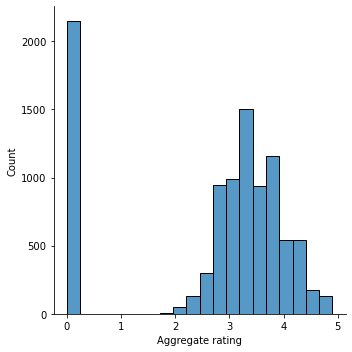

In [44]:
plt.figure(figsize=(9,7))

sns.displot(df1['Aggregate rating'], bins=20)

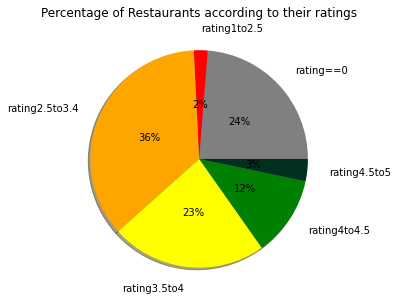

In [53]:
# Plotting the counts with the help of pie chart

slices = [(df1['Aggregate rating']==0).sum(), #color-gray
          ((df1['Aggregate rating']>=1) & (df1['Aggregate rating']<2.5)).sum(), #color-red
          ((df1['Aggregate rating']>=2.5) & (df1['Aggregate rating']<3.4)).sum(), #color-orange
          ((df1['Aggregate rating']>=3.5) & (df1['Aggregate rating']<4)).sum(), #color-yellow
          ((df1['Aggregate rating']>=4) & (df1['Aggregate rating']<4.5)).sum(), #color-green
          ((df1['Aggregate rating']>=4.5) & (df1['Aggregate rating']<=5)).sum(), #color-dark green   
         ]

labels = ['rating==0','rating1to2.5','rating2.5to3.4','rating3.5to4','rating4to4.5','rating4.5to5']
colors = ['gray','red','orange','yellow','green','#023020'] ##013220
plt.pie(slices, colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(5,5)
plt.show()

# Preprocessing 

Use LabelEncoder to convert categorical variables ('Has Table booking', 'Has Online delivery', 'Rating color', 'Rating text') into numerical format.

In [54]:
# Preprocess the dataset
label_encoder = LabelEncoder()
df1['Has Table booking'] = label_encoder.fit_transform(df1['Has Table booking'])
df1['Has Online delivery'] = label_encoder.fit_transform(df1['Has Online delivery'])
df1['Rating color'] = label_encoder.fit_transform(df1['Rating color'])
df1['Rating text'] = label_encoder.fit_transform(df1['Rating text'])

C:\Users\NiRaja\AppData\Local\Temp\ipykernel_23228\930556297.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NiRaja\AppData\Local\Temp\ipykernel_23228\930556297.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NiRaja\AppData\Local\Temp\ipykernel_23228\930556297.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [55]:
df1.head(5)

,Restaurant Name,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,"French, Japanese, Desserts",1100,1,0,No,3,4.8,0,1,314
1,Izakaya Kikufuji,Japanese,1200,1,0,No,3,4.5,0,1,591
2,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4000,1,0,No,4,4.4,1,5,270
3,Ooma,"Japanese, Sushi",1500,0,0,No,4,4.9,0,1,365
4,Sambo Kojin,"Japanese, Korean",1500,1,0,No,4,4.8,0,1,229


# Content-Based Filtering

Use CountVectorizer to convert the 'Cuisines' column into a matrix of token counts. Then, calculate the cosine similarity matrix between cuisines.

In [56]:
# Replace NaN values in the 'Cuisines' column with an empty string
df1['Cuisines'].fillna('', inplace=True)

# Content-based filtering
vectorizer = CountVectorizer()
cuisine_matrix = vectorizer.fit_transform(df1['Cuisines'])
cosine_sim = cosine_similarity(cuisine_matrix, cuisine_matrix)

cuisine_matrix

C:\Users\NiRaja\AppData\Local\Temp\ipykernel_23228\835772137.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<9542x150 sparse matrix of type '<class 'numpy.int64'>'
	with 27072 stored elements in Compressed Sparse Row format>

In [57]:
print(cuisine_matrix)

  (0, 45)	1
  (0, 57)	1
  (0, 76)	1
  (1, 76)	1
  (2, 8)	1
  (2, 53)	1
  (2, 69)	1
  (2, 124)	1
  (3, 76)	1
  (3, 136)	1
  (4, 76)	1
  (4, 82)	1
  (5, 34)	1
  (6, 8)	1
  (6, 51)	1
  (7, 8)	1
  (7, 51)	1
  (7, 53)	1
  (7, 124)	1
  (8, 8)	1
  (8, 51)	1
  (8, 69)	1
  (9, 53)	1
  (10, 53)	1
  (10, 95)	1
  :	:
  (9530, 120)	1
  (9531, 14)	1
  (9531, 56)	1
  (9532, 27)	1
  (9532, 45)	1
  (9532, 120)	1
  (9532, 144)	1
  (9533, 27)	1
  (9533, 120)	1
  (9534, 27)	1
  (9535, 12)	1
  (9535, 45)	1
  (9536, 25)	1
  (9536, 75)	1
  (9537, 144)	1
  (9538, 27)	1
  (9538, 41)	1
  (9538, 110)	1
  (9538, 149)	1
  (9539, 41)	1
  (9539, 74)	1
  (9539, 149)	1
  (9540, 27)	1
  (9540, 120)	1
  (9541, 27)	1


# Recommendation Function:

Define a function (get_recommendations) to get restaurant recommendations based on cosine similarity. It takes a restaurant title as input and returns the names of the top 3 similar restaurants.

In [58]:
def get_recommendations(title):
    idx = df1[df1['Restaurant Name'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:4]  # Get the top 3 similar restaurants
    restaurant_indices = [i[0] for i in sim_scores]
    return df1['Restaurant Name'].iloc[restaurant_indices]

# Sample User Preferences

Define sample user preferences, including preferred cuisine, maximum price, and minimum rating, has table booking, has online delievery, rating color and rating text.

In [86]:
user_preferences = {
    'Cuisine': ['Korean'],
    'MaxPrice': 300,
    'MinRating': 4,
    'HasTableBooking': 1,  # 1 for Yes, 0 for No
    'HasOnlineDelivery': 1,  # 1 for Yes, 0 for No
    'RatingColor': 'Green',
    'RatingText': 'Very Good'
}


Filter the dataset based on the user's preferences for cuisine, maximum price, and minimum rating, has table booking, has online delievery, rating color and rating text.

In [87]:
# Filter the dataset based on user preferences
filtered_df = df1[
    (df1['Cuisines'].apply(lambda x: all(cuisine in x for cuisine in user_preferences['Cuisine']))) &
    (df1['Average Cost for two'] >= user_preferences['MaxPrice']) &
    (df1['Aggregate rating'] >= user_preferences['MinRating']) &
    (df1['Has Table booking'] == user_preferences['HasTableBooking']) &
    (df1['Has Online delivery'] == user_preferences['HasOnlineDelivery']) &
    (df1['Rating color'] == df1['Rating color']) &
    (df1['Rating text'] == df1['Rating text'])
]

In [88]:
# Display the filtered DataFrame
# Print the DataFrame containing restaurants that match the user preferences.

print("\nFiltered DataFrame based on user preferences:")
print(filtered_df)


Filtered DataFrame based on user preferences:
      Restaurant Name Cuisines  Average Cost for two  Has Table booking  \
1854  Gung The Palace   Korean                  2500                  1   

      Has Online delivery Switch to order menu  Price range  Aggregate rating  \
1854                    1                   No            4               4.2   

      Rating color  Rating text  Votes  
1854             1            5    327  


If there are matching restaurants in the filtered DataFrame, use the get_recommendations function to suggest similar restaurants based on the first restaurant in the filtered list. Display the recommendations. If no matching restaurants are found, print a message indicating that there are no matches.

In [89]:
# Get recommendations based on the first restaurant in the filtered DataFrame

if not filtered_df.empty:
    sample_recommendation = get_recommendations(filtered_df['Restaurant Name'].iloc[0])
    print("\nRecommendations based on user preferences:")
    print(sample_recommendation)
else:
    print("\nNo restaurants match the user preferences.")


Recommendations based on user preferences:
1624      Hahn's Kitchen
1854     Gung The Palace
3283    Korea Restaurant
Name: Restaurant Name, dtype: object


In [ ]:
# Debugging prints
print("Unique Cuisines in DataFrame:", df1['Cuisines'].unique())
print("Unique Rating Colors in DataFrame:", df1['Rating color'].unique())
print("Unique Rating Texts in DataFrame:", df1['Rating text'].unique())

In [ ]:
print("Unique Cuisines in user_preferences:", user_preferences['Cuisine'])
print("Encoded Rating Color in user_preferences:", user_preferences['RatingColor'])
print("Encoded Rating Text in user_preferences:", user_preferences['RatingText'])
